# COGS 108 - Final Project 

# Overview

The Apple iOS App Store houses a plethora of apps ranging from Productivity, Gaming, Shopping, and more. In order to better understand what features contribute to a popular app, we analyzed a Kaggle dataset relating to 7,200 mobile apps in the iOS App Store. By creating various graphs, we questioned whether there was a relationship between an app’s average rating, number of ratings, primary genre/category, content rating, and price, which can be seen under our analysis. If there is, we can generally assume that certain features will increase the likelihood of an app’s popularity.

# Names

- Bianca Moy 
- Tiara Nguyen 
- Nicolette Shin 
- Mindy Xu 
- Ooduah Orafidiya 

# Research Question

How does an app’s features - content rating, number of ratings, average user rating, and category in the App Store - play a role in an app’s popularity?

As a group, our subjective definition of popularity is the number of reviews left on an app. From
our understanding, for every review left on an app, that indicates at least one download.

## Background and Prior Work


All of the members of this group own an iPhone, and in most countries, it is the most popular mobile device (DeviceAtlas). Each of our phones contain a plethora of apps ranging from productivity to social media to gaming. Our project analyzes the features of 7,200 apps from the App Store and aims to discover if there is a correlation present between that and an app's overall popularity. 
 
To prepare for this project, our group primarily worked towards navigating Apple’s API in order to extract information beyond what was provided in our Kaggle dataset. In efforts to retrieve information such as number of downloads, which was not a variable listed under our dataset, we researched various articles to help utilize their software. Unfortunately, our group was unsuccessful in figuring out the API, thus, we only analyzed the information from our Kaggle data set (Kaggle Dataset). 
 
Despite our failed efforts, we were still able to continue with our data analysis in exploring our research question. 


References (include links):
- https://deviceatlas.com/blog/most-popular-smartphones
- https://www.digitaltrends.com/mobile/android-vs-ios/

# Hypothesis


Null Hypothesis: <br/>
There is no correlation between the price, number of ratings, average user rating, category, and content rating of an app and its overall popularity.

Alternative Hypothesis: <br/>

There is a correlation between:<br/>
- Price vs. number of ratings between free and paid apps <br/>
We think that users are more willing to leave reviews for free apps since there’s virtually no commitment to downloading an app that’s free.

- Price vs. average user rating between free and paid apps <br/>
Users who have to pay for an app may have higher expectations for the app’s performance, thus if the performance is great or terrible, they’d be more prompted to leave a review.

- Primary genre vs. number of ratings between free and paid apps <br/>
Genre/category of the app could have an influence on the number of ratings left on the app

- Primary genre vs. average user rating between free and paid apps <br/>
Genre/category of the app could have an influence on the overall user rating

- Content rating vs. number of ratings between free and paid apps <br/>
An app’s content rating (Ages 4+, 12+, 18+, etc) can have an influence on the number of ratings. When you increase the content rating, you’re excluding a portion of the population who may fall under that age. 

- Content rating vs. average user rating between free and paid apps <br/>
An app’s content rating may have an influence on the average user rating of an app. 


# Dataset(s)

Link to dataset <br/>
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps?fbclid=IwAR3LP6l4om-A3kb272bckT7oN7ILjFRrruipPmR6gKGNM9PQ5bBv0HUuAik

The above data set contained 7197 rows and 16 columns worth of data that gave us insight on the features and details of 7,200 randomly scraped apps. In total, this provided us with 115,152 data points ranging from average user ratings for apps as well as price. We got this dataset from Kaggle.com, and the creator used R and linux web scraping tools to extract the data from Apple’s iTunes Search API.


### For our research question we chose to focus on the following variables:
- Price Amount
- User Rating Counts (total)
- Average User Rating Value (for all versions)
- Primary Genre
- Content Rating

### Other variables included in the data set are:
- App ID
- App Name
- Size (in bytes)
- Currency Type
- User Rating Counts (for current version)
- Average User Rating Value (for current version)
- Latest Version Code
- Number of Supporting Devices
- Number of Screenshots Showed for Display
- Number of Supported Languages
- Vpp Device Based License Enabled

### Problems With Our Dataset

One issue that we came across with our dataset is that we weren’t aware of the measures taken to choose the 7,200 apps featured. The apps could have been selected through a random number generator or been the top 7,200 apps in the iOS App Store, however, this was not addressed in our dataset’s description and overview. 
<br/><br/>
While consolidating and cleaning our data, we found that a majority of apps present were games. Whether or not this was a purposeful choice made by the user, our group found that this had the ability to skew our results. Therefore, we accounted for this issue in our overall data cleaning process and separated the data into two categories - games and other apps. From here, we created sub-categories for the other apps such as education, business, social media, and more.



# Setup

In [1]:
## YOUR CODE HERE
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

First we wanted to see if there were any correlations to begin with. 

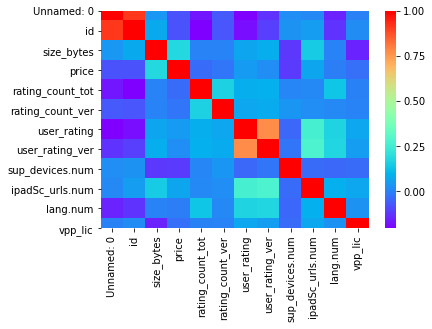

In [2]:
## Corelation between all features of dataset 

## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
df=pd.read_csv('AppleStore.csv')
sns.heatmap(df.corr(),cmap="rainbow")

We removed id, size, version, and Vpp Device because the id isn't displayed on the app store, the size could vary based on user data after they've used the app, the version number doesn't indicate when it was last updated, and we assumed the average consumer didn't know about "Vpp Device Based Licensing Enabled." Additionally, we removed an unnamed column that didn't seem to mean ranking, and we removed content rating because we didn't want to exclude apps based on age. 

We also removed number of language supported and the type of currency because all were in USD, and the primary language in the US is English. The number of devices supported didn't distinguish between Apple products such as iPhone, iPad, Apple Watch, and MacBooks so we removed that column. The column labeled "ipadSc_urls.num" which was supposed to represent the number of screenshots displayed was taken out because looking through the data, it stated that Paypal had 0 screenshots. When looking at the actual PayPal page on the App Store, it had screenshots, but for the iPhone version. We think that "ipadSc_urls.num" only counts number of screenshots displayed on the App Store on the iPad. 

We removed both rating and rating count for the current version because a current version could have been made very recently, and some of the users may not have updated to the latest application. We believe a better representation of an app's rating is its rating overall through all versions. 

We renamed the labels of the columns to better reflect what they represent and for us to understand more easily.

In [3]:
## Drop and remane columns
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION


df
df = df.drop(columns= ["id","size_bytes","ver","vpp_lic",
                      "sup_devices.num","currency",
                     "user_rating_ver",
                     "lang.num","rating_count_ver",
                    "ipadSc_urls.num"] )
df
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.columns=['app','price','total ratings','rating','cont_rating','categories']

df.dropna(inplace=True)

df.head()


,app,price,total ratings,rating,cont_rating,categories
0,PAC-MAN Premium,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,12+,Shopping
4,Bible,0.00,985920,4.5,4+,Reference


After dropping the columns we didnt need, we checked to see if our remaining columns had any null data.
We found that none of our rows had null data. 

In [4]:
# Check dataset for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 6 columns):
app              7197 non-null object
price            7197 non-null float64
total ratings    7197 non-null int64
rating           7197 non-null float64
cont_rating      7197 non-null object
categories       7197 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 393.6+ KB


### Games vs. All other apps 
We see that the Games category is much bigger than the rest of the categories. So we decided to split up the Games into its own category separate from the other apps.

In [5]:
# Check value counts
df['categories'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: categories, dtype: int64

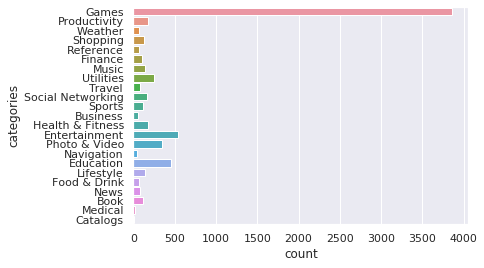

In [6]:
# Distributon of categories 
sns.set(style="darkgrid")
ax = sns.countplot(y=df['categories'])

In this cell we created a data frame exclusively for games.

In [7]:
# Dataframes of just games, Separate games from other apps
games=  df[df ['categories'] == 'Games']
games

,app,price,total ratings,rating,cont_rating,categories
0,PAC-MAN Premium,3.99,21292,4.0,4+,Games
5,Shanghai Mahjong,0.99,8253,4.0,4+,Games
9,Ms. PAC-MAN,3.99,7885,4.0,4+,Games
10,Solitaire by MobilityWare,4.99,76720,4.5,4+,Games
11,SCRABBLE Premium,7.99,105776,3.5,4+,Games
...,...,...,...,...,...,...
7191,Plead the Fifth - The Game,2.99,11,4.0,17+,Games
7192,Kubik,0.00,142,4.5,4+,Games
7193,VR Roller-Coaster,0.00,30,4.5,4+,Games
7195,VR Roller Coaster World - Virtual Reality,0.00,85,4.5,12+,Games


In this cell we created a data frame specifically for apps(everything aside from games)

In [8]:
# Data frame of Apps
apps = df[df['categories'] != 'Games']
apps

,app,price,total ratings,rating,cont_rating,categories
1,Evernote - stay organized,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,12+,Shopping
4,Bible,0.00,985920,4.5,4+,Reference
6,PayPal - Send and request money safely,0.00,119487,4.0,4+,Finance
...,...,...,...,...,...,...
7173,My Diary - 你的名字非官方,0.99,0,0.0,4+,Utilities
7179,Fam — Group video calling for iMessage,0.00,279,3.5,4+,Social Networking
7180,Laurie Hernandez the Human Emoji,0.00,26,5.0,9+,Utilities
7182,camera for filter,0.00,0,0.0,4+,Photo & Video


### Paid vs Unpaid Subcategories for Games and Apps
We also decided to divide games and apps into subcategores of paid and unpaid to see if price had any factor in their ratings. 

In [9]:
# Separate games into paid and unpaid
g_paid = games[games['price'] != 0 ]
g_unpaid = games[games['price'] == 0]

#check values
#g_paid
#g_unpaid




In [10]:
# Paid Games 
g_paid 

,app,price,total ratings,rating,cont_rating,categories
0,PAC-MAN Premium,3.99,21292,4.0,4+,Games
5,Shanghai Mahjong,0.99,8253,4.0,4+,Games
9,Ms. PAC-MAN,3.99,7885,4.0,4+,Games
10,Solitaire by MobilityWare,4.99,76720,4.5,4+,Games
11,SCRABBLE Premium,7.99,105776,3.5,4+,Games
...,...,...,...,...,...,...
7183,Survivalcraft 2,3.99,292,4.0,9+,Games
7185,问仙奇遇-新玩法新套装嗨到爆,0.99,0,0.0,9+,Games
7189,飞刀传奇-动作武侠热血江湖即时PK传奇（登录爆金装）,0.99,0,0.0,9+,Games
7190,Add-Ons Studio for Minecraft,2.99,97,3.0,4+,Games


In [11]:
# Free games
g_unpaid

,app,price,total ratings,rating,cont_rating,categories
26,Hangman.,0.0,42316,3.0,9+,Games
33,Blackjack by MobilityWare,0.0,180087,3.5,12+,Games
47,PAC-MAN,0.0,508808,3.0,4+,Games
86,Beer Pong Game,0.0,187315,2.0,17+,Games
108,NYTimes Crossword - Daily Word Puzzle Game,0.0,53465,3.5,4+,Games
...,...,...,...,...,...,...
7188,Demolition Derby Virtual Reality (VR) Racing,0.0,18,4.0,12+,Games
7192,Kubik,0.0,142,4.5,4+,Games
7193,VR Roller-Coaster,0.0,30,4.5,4+,Games
7195,VR Roller Coaster World - Virtual Reality,0.0,85,4.5,12+,Games


Separate data frames for free and paid apps

In [12]:
# seperate apps into paid and unpaid

a_paid = apps[apps['price'] != 0]
a_unpaid = apps[apps['price'] == 0]

# print dfs
#a_paid
#a_unpaid


In [13]:
#Paid apps
a_paid 

,app,price,total ratings,rating,cont_rating,categories
8,PCalc - The Best Calculator,9.99,1117,4.5,4+,Utilities
20,iQuran,1.99,2929,4.5,4+,Reference
23,Mileage Log | Fahrtenbuch,5.99,8,4.5,4+,Business
24,Cleartune - Chromatic Tuner,3.99,3241,4.0,4+,Music
28,TouchOSC,4.99,782,4.0,4+,Music
...,...,...,...,...,...,...
7159,EMOJIZI BOOBA,1.99,1,4.0,17+,Utilities
7160,Addon Creator Studio for Minecraft PE,1.99,214,4.0,12+,Entertainment
7169,Talking Santa - Video santa claus calls you,2.99,9,3.0,4+,Entertainment
7173,My Diary - 你的名字非官方,0.99,0,0.0,4+,Utilities


In [14]:
#Free apps
a_unpaid

,app,price,total ratings,rating,cont_rating,categories
1,Evernote - stay organized,0.0,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.0,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.0,262241,4.0,12+,Shopping
4,Bible,0.0,985920,4.5,4+,Reference
6,PayPal - Send and request money safely,0.0,119487,4.0,4+,Finance
...,...,...,...,...,...,...
7163,NORAD Tracks Santa Claus,0.0,70,2.5,4+,Entertainment
7170,CTFxCmoji,0.0,39,5.0,9+,Social Networking
7179,Fam — Group video calling for iMessage,0.0,279,3.5,4+,Social Networking
7180,Laurie Hernandez the Human Emoji,0.0,26,5.0,9+,Utilities


#  Data Analysis & Results

### Rating vs Total Ratings for Paid and Unpaid Games 

We looked at the rating scale and total number of ratings for paid and unpaid games. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


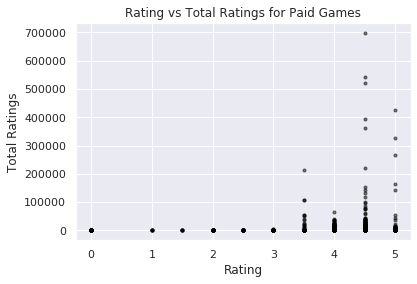

In [15]:
#paid games
# rating vs total ratings
colors = (0,0,0)
area = np.pi*3

plt.scatter(g_paid['rating'], g_paid['total ratings'], s=area, c=colors, alpha=0.5)
plt.title('Rating vs Total Ratings for Paid Games')
plt.xlabel('Rating')
plt.ylabel('Total Ratings')
#plt.xlim(-1, 100)
#plt.ylim(-1, 5)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


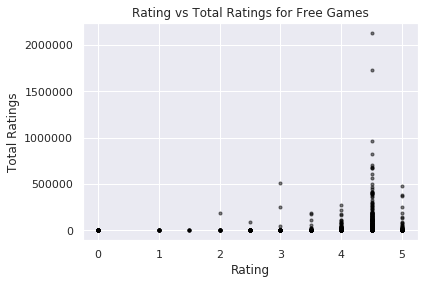

In [16]:
# free games
colors = (0,0,0)
area = np.pi*3

plt.scatter(g_unpaid['rating'], g_unpaid['total ratings'], s=area, c=colors, alpha=0.5)
plt.title('Rating vs Total Ratings for Free Games')
plt.xlabel('Rating')
plt.ylabel('Total Ratings')
#plt.xlim(-1, 100)
#plt.ylim(-1, 5)
plt.show()

### Content rating vs rating for Paid and Unpaid Games

We tried to see if the content rating of an app, which specifies the age group that the app is catered towards, has any relation to the ratings. This was separated for paid and unpaid games.  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


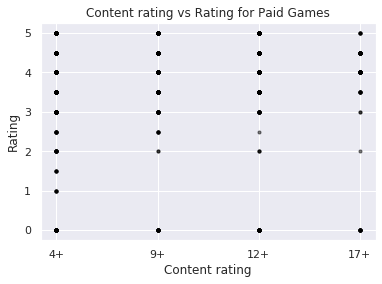

In [17]:
#paid games
# rating vs total ratings
colors = (0,0,0)
area = np.pi*3

plt.scatter(g_paid['cont_rating'], g_paid['rating'], s=area, c=colors, alpha=0.5)
plt.title('Content rating vs Rating for Paid Games')
plt.xlabel('Content rating')
plt.ylabel('Rating')
#plt.xlim(-1, 100)
#plt.ylim(-1, 5)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


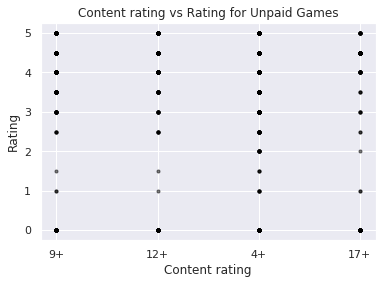

In [18]:
#unpaid games
# rating vs total ratings
colors = (0,0,0)
area = np.pi*3

plt.scatter(g_unpaid['cont_rating'], g_unpaid['rating'], s=area, c=colors, alpha=0.5)
plt.title('Content rating vs Rating for Unpaid Games')
plt.xlabel('Content rating')
plt.ylabel('Rating')
#plt.xlim(-1, 100)
#plt.ylim(-1, 5)
plt.show()

## Apps - Paid vs Free 

Here, we looked at apps in general and compared the ratings for paid and free apps. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


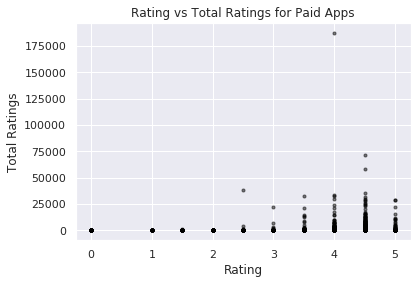

In [19]:
colors = (0,0,0)
area = np.pi*3

plt.scatter(a_paid['rating'], a_paid['total ratings'], s=area, c=colors, alpha=0.5)
plt.title('Rating vs Total Ratings for Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Total Ratings')
#plt.xlim(-1, 100)
#plt.ylim(-1, 1000000)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


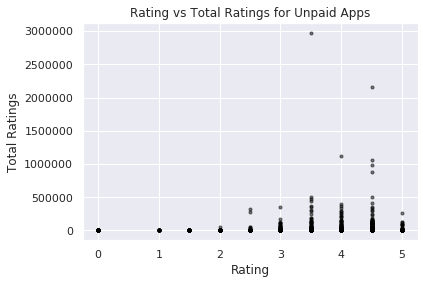

In [20]:
colors = (0,0,0)
area = np.pi*3

plt.scatter(a_unpaid['rating'], a_unpaid['total ratings'], s=area, c=colors, alpha=0.5)
plt.title('Rating vs Total Ratings for Unpaid Apps')
plt.xlabel('Rating')
plt.ylabel('Total Ratings')
#plt.xlim(-1, 100)
#plt.ylim(-1, 1000000)
plt.show()

# Content rating vs rating/ paid and free 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


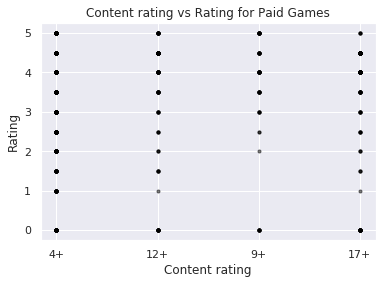

In [21]:
#paid apps
# content rating vs ratings
colors = (0,0,0)
area = np.pi*3

plt.scatter(a_paid['cont_rating'], a_paid['rating'], s=area, c=colors, alpha=0.5)
plt.title('Content rating vs Rating for Paid Games')
plt.xlabel('Content rating')
plt.ylabel('Rating')
#plt.xlim(-1, 100)
#plt.ylim(-1, 5)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


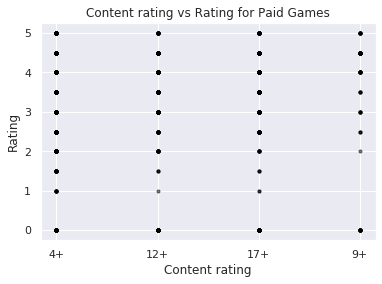

In [22]:
#paid apps
# content rating vs total ratings
colors = (0,0,0)
area = np.pi*3

plt.scatter(a_unpaid['cont_rating'], a_unpaid['rating'], s=area, c=colors, alpha=0.5)
plt.title('Content rating vs Rating for Paid Games')
plt.xlabel('Content rating')
plt.ylabel('Rating')
#plt.xlim(-1, 100)
#plt.ylim(-1, 5)
plt.show()

## Comparing free vs paid apps

Comparing free and paid games and apps and their ratings. The first graph looks at paid games vs. unpaid games and their ratings. The second graph does the same but with paid and unpaid apps.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AxesSubplot(0.125,0.125;0.775x0.755)


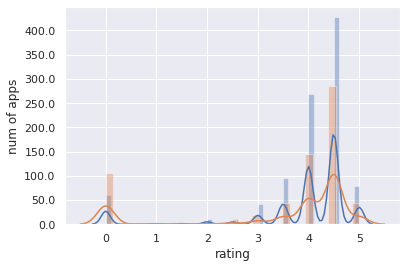

In [23]:
sns.set_style(style='darkgrid')
gp=sns.distplot(g_paid['rating'],hist=True,kde=True) #blue paid games
gu=sns.distplot(g_unpaid ['rating'],hist=True,kde=True) #orange unpaid games
ylabels = ['{:,.1f}'.format(y) for y in gp.get_yticks()*100]
gp.set_yticklabels(ylabels)
gp.set(ylabel = 'num of apps', xlabel='rating') 
print(gp)

AxesSubplot(0.125,0.125;0.775x0.755)


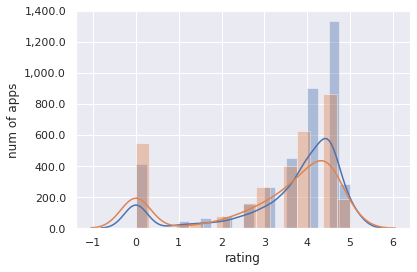

In [24]:
sns.set_style(style='darkgrid')
ap=sns.distplot(a_paid['rating'],hist=True,kde=True) #blue paid apps 
au=sns.distplot(a_unpaid ['rating'],hist=True,kde=True) #orange unpaid apps
ap.set(ylim = (0,1.4))
ylabels = ['{:,.1f}'.format(y) for y in ap.get_yticks()*1000]
ap.set_yticklabels(ylabels)
ap.set(ylabel = 'num of apps', xlabel='rating') 
print(ap)

# Ethics & Privacy

We have permission to use the chosen dataset from Kaggle because it was made public on the Kaggle website with a GPL 2 license, which gives us the freedom to access, modify, and share the information. In addition, while we did not scrape data directly from Apple’s App Store, we used publicly available data - in our case, the Kaggle dataset. Being that this data has been made available to the public on Kaggle, we believe that we have permission to utilize this information in order to examine possible connections between various characteristics of mobile device applications and their popularity.

In relation to privacy concerns, Kaggle collects information from users even if they have not created an account, such as what web browser, application, or mobile device they are utilizing. This website additionally collects information such as Internet Protocol Address (IP address), websites visited before and after using Kaggle, and the content you visit on Kaggle. However, the data that they collect from users is protected and anonymized, and the dataset did not collect user or device information that could identify unique individuals.

The dataset represents a subset of the iOS App Store - specifically 7,200 apps -  and does not represent the store as a whole, which posed limitations in our data analysis. There are more than 2 million apps available in the Apple Store, so our sample data is roughly 0.36% of the entire dataset of apps. Therefore, we recognize the fact that our data analysis is not entirely comprehensive in determining whether an app’s features such as ratings and price have an influence on its popularity, which could have skewed the results of our analysis. Nevertheless, our findings from our data analysis allowed us to have a greater understanding of the prospective factors that could influence the popularity of an app.


# Conclusion & Discussion

Based on the results of our data analysis, we saw overall support for our null hypothesis with the exception of one situation. That exception was that paid games tended to get more positive ratings (4.5+ stars) than those that were unpaid. A possible reason is that companies who create paid apps could put more time into highlighting user experience and creating value for the user. Yet, this finding does not provide enough substance to conclude that paid apps have a higher likelihood of receiving high reviews. 

Considering the features that were observed, - price, content rating, number of ratings, average user rating, and primary genre - there did not seem to be an effect on an app’s popularity. We were unable to find statistical significance in relation to an app’s features and its popularity, thus proving that our null hypothesis is true. 

There are still improvements to be made with our project and limitations to be addressed. For instance, without knowing how to navigate Apple’s API, we lost out on the potential to extract information about the number of app downloads. Not only this, but we could have extracted data about top apps, instead of 7,200 random apps, in order to gain insight about what commonalities coexist between them. For the future, more experience and research would be necessary to address these obstacles.